Importar librerías

In [ ]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ejercicio 1
Generar conjuntos de entrenamiento y validación




In [ ]:

np.random.seed(42)
train_x = np.random.uniform(low=-1, high=1, size=(1000, 2))
train_y = np.sin(1 / (train_x[:, 0] * train_x[:, 1]))
test_x = np.random.uniform(low=-1, high=1, size=(10000, 2))
test_y = np.sin(1 / (test_x[:, 0] * test_x[:, 1]))


Entrenar modelos de regresión lineal




In [ ]:
train_predictions_mean_squared_error = np.zeros(10)
train_predictions_rsquared = np.zeros(10)
train_predictions_mean_absolute_error = np.zeros(10)
test_predictions_mean_squared_error = np.zeros(10)
test_predictions_rsquared = np.zeros(10)
test_predictions_mean_absolute_error = np.zeros(10)

for idx, i in enumerate(range(100, 1001, 100)):
  model = LinearRegression().fit(train_x[:i], train_y[:i]) #train model with training set percentage
  train_predictions = model.predict(train_x[:i]) #make predictions
  #calculate metrics for training set
  train_predictions_mean_squared_error[idx] = mean_squared_error(train_y[:i], train_predictions)
  train_predictions_mean_absolute_error[idx] = mean_absolute_error(train_y[:i], train_predictions)
  train_predictions_rsquared[idx] = model.score(train_x[:i], train_y[:i])
  #calculate metrics for test set
  test_predictions = model.predict(test_x)
  test_predictions_mean_squared_error[idx] = mean_squared_error(test_y, test_predictions)
  test_predictions_mean_absolute_error[idx] = mean_absolute_error(test_y, test_predictions)
  test_predictions_rsquared[idx] = model.score(test_x, test_y)



Diagramas de Error Medio Cuadrado, Error Medio Absoluto y R-Squared

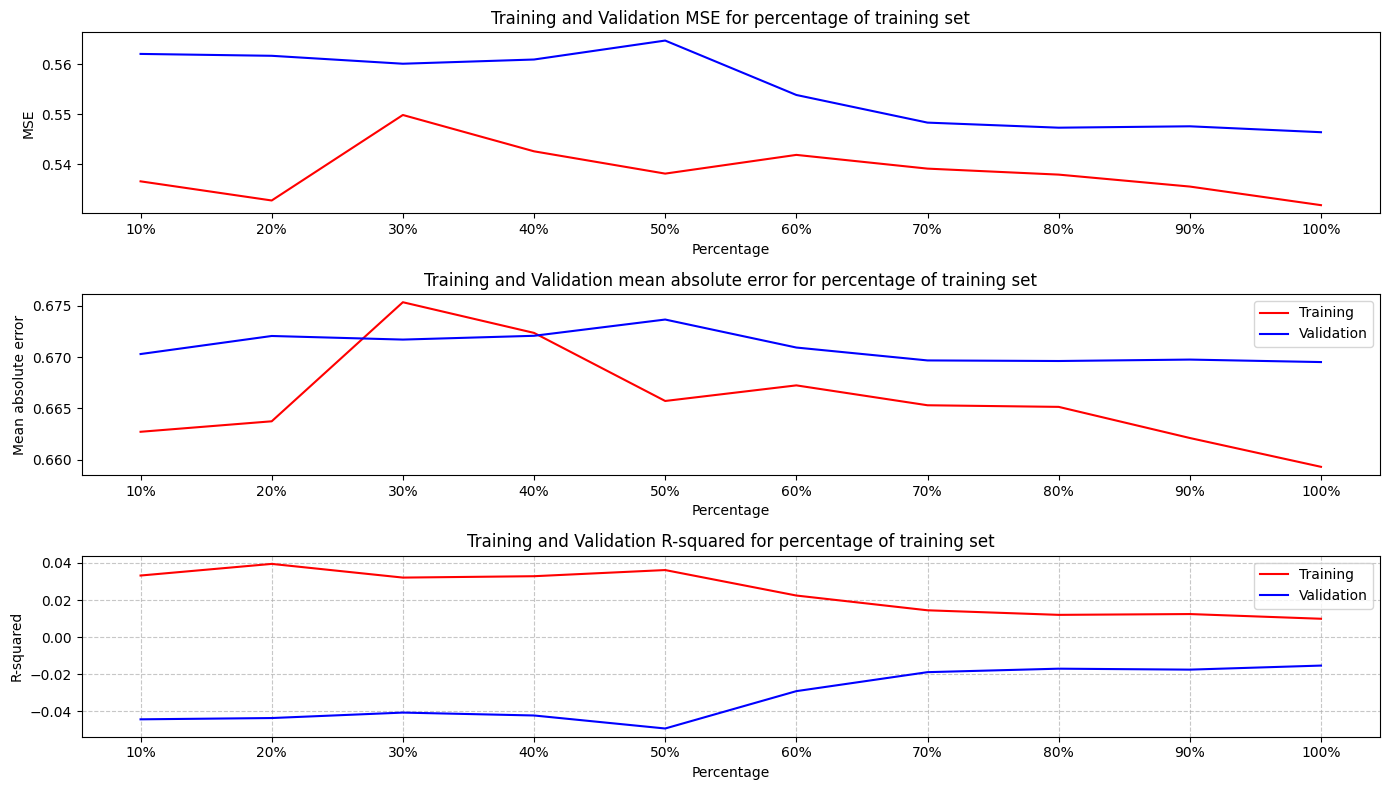

In [ ]:
x = np.linspace(0.1, 1.0, 10)
x_labels = [f'{int(val * 100)}%' for val in x]
fig, axes = plt.subplots(3, 1, figsize=(14, 8))
#MSE
axes[0].plot(x, train_predictions_mean_squared_error, label='Training', color='red')
axes[0].plot(x, test_predictions_mean_squared_error, label='Validation', color='blue')
axes[0].set_xticks(ticks=x, labels=x_labels)
axes[0].set_title('Training and Validation MSE for percentage of training set')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('MSE')

#MAE
axes[1].plot(x, train_predictions_mean_absolute_error, label='Training', color='red')
axes[1].plot(x, test_predictions_mean_absolute_error, label='Validation', color='blue')
axes[1].set_xticks(ticks=x, labels=x_labels)
axes[1].set_title('Training and Validation mean absolute error for percentage of training set')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Mean absolute error')
axes[1].legend()

#R-squared
axes[2].plot(x, train_predictions_rsquared, label='Training', color='red')
axes[2].plot(x, test_predictions_rsquared, label='Validation', color='blue')
axes[2].set_xticks(ticks=x, labels=x_labels)
axes[2].set_title('Training and Validation R-squared for percentage of training set')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('R-squared')
axes[2].legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Ejercicio 2

Podemos ver que el rendimiento del modelo es bajo, algo que ya esperabamos porque usamos un modelo lineal para predecir una función con comportamiento non lineal. Además, podemos ver que no hay mejoramiento cuando se aumenta el porcentaje de la muestra, algo que significa que no va a haber mejoramiento del rendimiento si usamos una muestra más grande.

Específicamente, en los gráficos de las errores medias cuadradas y absolutas observamos que no hay mejoramiento cuando se aumenta la muestra y en el gráfico de r-squared podemos ver que la aproximación no es buena

# Ejercicio 3

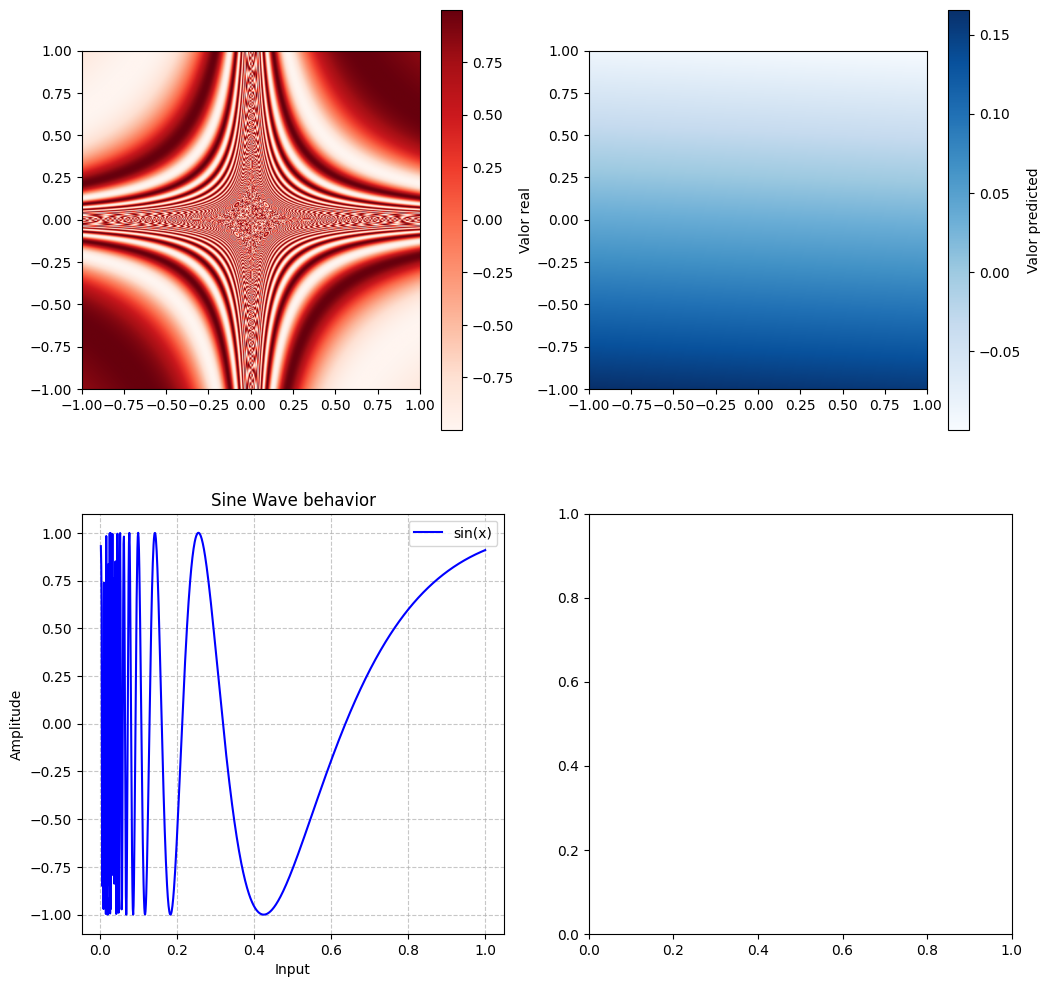

<Figure size 640x480 with 0 Axes>

In [ ]:
x = np.linspace(-1, 1, 500)
y = np.linspace(-1, 1, 500)
xv, yv = np.meshgrid(x, y)
z_real = np.sin( 1 / (xv * yv))
z_predicted = model.predict(np.column_stack((xv.ravel(), yv.ravel()))).reshape(500, 500)
plot_extent = (x.min(), x.max(), y.min(), y.max())

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
mappableReal = axes[0][0].imshow(z_real, cmap='Reds', origin='lower', extent=plot_extent)
mappablePredicted = axes[0][1].imshow(z_predicted, cmap='Blues', origin='lower', extent=plot_extent)
plt.colorbar(mappableReal, ax=axes[0][0], label='Valor real')
plt.colorbar(mappablePredicted, ax=axes[0][1], label='Valor predicted')

### Print sin function
x1 = np.linspace(0.001, 1, 1000)
x2 = .5
y = np.sin( 1 / (x1 * x2))
np.shape(y)

axes[1][0].plot(x1, y, label='sin(x)', color='blue')
axes[1][0].set_title('Sine Wave behavior')
axes[1][0].set_xlabel('Input')
axes[1][0].set_ylabel('Amplitude')
axes[1][0].grid(True, linestyle='--', alpha=0.7)
axes[1][0].legend()

plt.show()

plt.tight_layout()

# Ejercicio 4

Para interpretar el valor real tenemos que pensar en el comportamiento del seno. Como ya sabemos es una función periódica con período 2*π y rango de valores [-1, 1].
Cuando:
1. (x1->1 y x2->1) o (x1->-1 y x2->-1) 1/(x1 * x2) -> 1 y el seno toma valores positivos
2. (x1->-1 y x2->1) o (x1->1 y x2->-1) 1/(x1 * x2) -> -1 y el seno toma valores negativos
3. x1 o x2 se acerca a 0: 1/(x1 * x2) -> infinito y por cambios pequeños en las variables el valor de la función cambia mucho cobrando todo su rango de valores y por eso podemos ver ese cambio de colores en nuestro gráfico y lo podemos averguar en el gráfico de seno.

A propósito de nuestro modelo:
Hemos usado regresión lineal y por lo tanto la función de predicción es un plano. Claramente, es imposible predecir valores de la función real cerca de los ejes teniendo en cuenta su comportamiento. Para los demás valores nuestro modelo solo llega a predecir el comportamiento de la función para valores cerca de (-1, 1) y (-1, -1) lo cual también se debe a limitaciones de su geometría.


# Ejercicio 5

Para intentar y mejorar el rendimiento del modelo vamos a generar nuevos rasgos. Lo haremos aproximando la función con polinomios


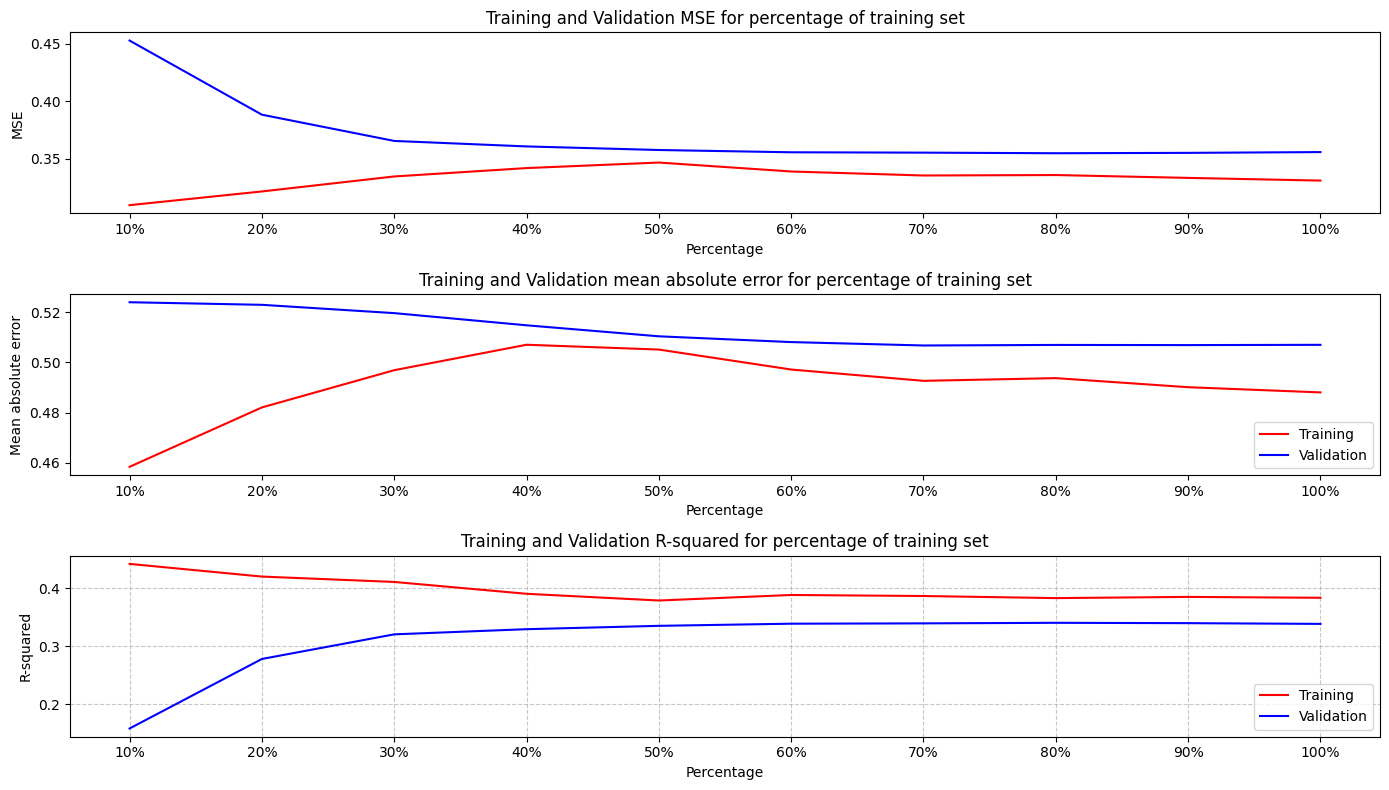

In [ ]:
train_x_poli = np.vstack(
    (

        (train_x[:, 0] * train_x[:, 1]),
        np.power(train_x[:, 0] * train_x[:, 1], 2),
        np.power(train_x[:, 0] * train_x[:, 1], 3),
        np.power(train_x[:, 0] * train_x[:, 1], 4),
        np.power(train_x[:, 0] * train_x[:, 1], 5),
)).T
test_x_poli = np.vstack(
    (
        (test_x[:, 0] * test_x[:, 1]),
        np.power(test_x[:, 0] * test_x[:, 1], 2),
        np.power(test_x[:, 0] * test_x[:, 1], 3),
        np.power(test_x[:, 0] * test_x[:, 1], 4),
        np.power(test_x[:, 0] * test_x[:, 1], 5),
)).T

train_predictions_mean_squared_error = np.zeros(10)
train_predictions_rsquared = np.zeros(10)
train_predictions_mean_absolute_error = np.zeros(10)
test_predictions_mean_squared_error = np.zeros(10)
test_predictions_rsquared = np.zeros(10)
test_predictions_mean_absolute_error = np.zeros(10)

for idx, i in enumerate(range(100, 1001, 100)):
  model = LinearRegression().fit(train_x_poli[:i], train_y[:i]) #train model with training set percentage
  train_predictions = model.predict(train_x_poli[:i]) #make predictions
  #calculate metrics for training set
  train_predictions_mean_squared_error[idx] = mean_squared_error(train_y[:i], train_predictions)
  train_predictions_mean_absolute_error[idx] = mean_absolute_error(train_y[:i], train_predictions)
  train_predictions_rsquared[idx] = model.score(train_x_poli[:i], train_y[:i])
  #calculate metrics for test set
  test_predictions = model.predict(test_x_poli)
  test_predictions_mean_squared_error[idx] = mean_squared_error(test_y, test_predictions)
  test_predictions_mean_absolute_error[idx] = mean_absolute_error(test_y, test_predictions)
  test_predictions_rsquared[idx] = model.score(test_x_poli, test_y)

x = np.linspace(0.1, 1.0, 10)
x_labels = [f'{int(val * 100)}%' for val in x]
fig, axes = plt.subplots(3, 1, figsize=(14, 8))
#MSE
axes[0].plot(x, train_predictions_mean_squared_error, label='Training', color='red')
axes[0].plot(x, test_predictions_mean_squared_error, label='Validation', color='blue')
axes[0].set_xticks(ticks=x, labels=x_labels)
axes[0].set_title('Training and Validation MSE for percentage of training set')
axes[0].set_xlabel('Percentage')
axes[0].set_ylabel('MSE')

#MAE
axes[1].plot(x, train_predictions_mean_absolute_error, label='Training', color='red')
axes[1].plot(x, test_predictions_mean_absolute_error, label='Validation', color='blue')
axes[1].set_xticks(ticks=x, labels=x_labels)
axes[1].set_title('Training and Validation mean absolute error for percentage of training set')
axes[1].set_xlabel('Percentage')
axes[1].set_ylabel('Mean absolute error')
axes[1].legend()

#R-squared
axes[2].plot(x, train_predictions_rsquared, label='Training', color='red')
axes[2].plot(x, test_predictions_rsquared, label='Validation', color='blue')
axes[2].set_xticks(ticks=x, labels=x_labels)
axes[2].set_title('Training and Validation R-squared for percentage of training set')
axes[2].set_xlabel('Percentage')
axes[2].set_ylabel('R-squared')
axes[2].legend()

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

Podemos ver que el rendimiento del modelo ha mejorado considerablemente. El mae y el rmse se han reducido y el r-squared se ha aumentado mucho explicando un buen porcentaje de la varianza.
Además, se ve que tenemos sobre ajuste por que el modelo tiene bastante mejores métricos en el conjunto de entrenamiento. Por lo tanto, no parece buena estrategia seguir añadiendo términos en la función polinomial